## Mod inst

In [1]:
!pip install --upgrade holidays

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 226.5/226.5 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 47.9/47.9 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for PyMeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732057 sha256=c81d477ca70ee5f0d720bf191a30739ef1258529cd9a826f7cf28adda1311305
  Stored in directory: c:\users\maks1\appdata\local\pip\cache\wheels\9b\0a\31\eb0e590d74ec13e90493cb6d1cd92a379a1a3b8f12ed778a14
Successfully built PyMeeus


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install osmium

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 1.3/1.3 MB 2.5 MB/s eta 0:00:00


In [8]:
!python.exe -m pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 2.1/2.1 MB 3.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [13]:
!pip install osmiter

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 420.6/420.6 kB 2.4 MB/s eta 0:00:00


## Import

In [233]:
from lightgbm import LGBMRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso, Ridge, ElasticNetCV, SGDRegressor, ElasticNet, LinearRegression, BayesianRidge, LogisticRegression, LarsCV, LassoCV, LassoLarsCV, LogisticRegressionCV, MultiTaskElasticNetCV, MultiTaskLassoCV, OrthogonalMatchingPursuitCV, RidgeCV, RidgeClassifierCV

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from datetime import date

from sklearn.ensemble import GradientBoostingRegressor

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from time import time
from datetime import datetime
import numpy as np

import lightgbm as lgb
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll.base import scope

pd.options.display.max_columns = None

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, mean_absolute_percentage_error


## Orders

In [9]:
ds_orders = pd.read_csv("data/orders.csv")
ds_orders.head()

,Id,running_time,completed_time,route_distance_km,delta_time
0,7013180891535596072,2022-01-24 11:04:12,2022-01-24 11:14:07,4.061,595.0
1,-1446874864726772723,2022-01-24 18:31:03,2022-01-24 18:44:03,2.766,780.0
2,-7109832734562886369,2022-01-24 07:33:11,2022-01-24 07:38:33,2.022,322.0
3,5574536568610609787,2022-01-24 17:23:20,2022-01-24 17:35:11,4.309,711.0
4,-9022427340295022993,2022-01-24 18:01:45,2022-01-24 18:07:09,1.819,324.0


## Nodes

In [10]:
ds_nodes = pd.read_csv("data/nodes.csv")
ds_nodes.head()

,Id,node_start,node_finish,distance,speed
0,1403210517021349791,290773715,2041636852,64.755864,36.0
1,1403210517021349791,290773722,2163829963,59.012828,36.0
2,1403210517021349791,290773723,3129305123,8.709567,34.0
3,1403210517021349791,291071720,5216935099,275.796769,33.0
4,1403210517021349791,297978510,3684572319,8.141696,38.0


In [51]:
ds_nodes.node_start.min()

10980417

In [62]:
ds_nodes[(ds_nodes.node_start == 290773715) & (ds_nodes.node_finish == 2041636852)].head()


,Id,node_start,node_finish,distance,speed
0,1403210517021349791,290773715,2041636852,64.755864,36.0
1288,-6121885842330106250,290773715,2041636852,64.755799,36.0
1718,1360686813931198539,290773715,2041636852,64.755867,41.0
23251,-6585029545990233408,290773715,2041636852,64.755776,46.0
24880,-7417366892351501483,290773715,2041636852,64.755791,51.0


In [64]:
ds_nodes[ds_nodes.Id == 5574536568610609787]


,Id,node_start,node_finish,distance,speed
285572,5574536568610609787,277661601,3285024103,10.126109,20.0
285573,5574536568610609787,277661602,3285024101,5.874858,14.0
285574,5574536568610609787,277661610,3285024099,5.834791,17.0
285575,5574536568610609787,289687060,4773604154,6.578443,32.0
285576,5574536568610609787,290897496,4773604167,87.195363,33.0
...,...,...,...,...,...
285644,5574536568610609787,7087236959,4779530659,10.129262,13.0
285645,5574536568610609787,7492184513,2408742782,56.485697,23.0
285646,5574536568610609787,8128737172,4773705192,17.511577,36.0
285647,5574536568610609787,8952393751,277661601,8.824282,23.0


### Weather

In [11]:
import osmium as osm


class OSMHandler(osm.SimpleHandler):
    def __init__(self):
        osm.SimpleHandler.__init__(self)
        self.node_count = 0
        self.way_count = 0
        self.relation_count = 0

    def node(self, n):
        self.node_count += 1

    def way(self, w):
        self.way_count += 1

    def relation(self, r):
        self.relation_count += 1


osmhandler = OSMHandler()
osmhandler.apply_file("data/odessa_oblast.osm.pbf")
print(f'Number of nodes: {osmhandler.node_count}')
print(f'Number of way: {osmhandler.way_count}')
print(f'Number of relations: {osmhandler.relation_count}')


Number of nodes: 4025495
Number of way: 468505
Number of relations: 11647


In [12]:
import osmiter

shop_count = 0

for feature in osmiter.iter_from_osm("data/odessa_oblast.osm.pbf"):
    if feature["type"] == "node" and "shop" in feature["tag"]:
        shop_count += 1

print(f"this osm file containes {shop_count} shop nodes")


this osm file containes 4244 shop nodes


In [13]:
dic_odessa_weather = dict()
i = 0
for feat in osmiter.iter_from_osm("data/odessa_oblast.osm.pbf"):
    dic_odessa_weather[str(i)] = feat
    i += 1

In [14]:
ds_odessa_weather_raw = pd.DataFrame(dic_odessa_weather)
ds_odessa_weather_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,4505637,4505638,4505639,4505640,4505641,4505642,4505643,4505644,4505645,4505646
type,node,node,node,node,node,node,node,node,node,node,...,relation,relation,relation,relation,relation,relation,relation,relation,relation,relation
id,10980417,10980418,10980419,10980421,10980422,10980423,10980427,10980429,10980430,10980431,...,15536155,15536156,15536157,15536158,15536159,15536160,15536161,15536162,15549561,15550053
tag,{},{},{'highway': 'traffic_signals'},{'highway': 'traffic_signals'},{'highway': 'traffic_signals'},{'highway': 'traffic_signals'},{'highway': 'traffic_signals'},{},{'highway': 'traffic_signals'},{'highway': 'traffic_signals'},...,"{'crop': 'grape', 'landuse': 'vineyard', 'type...","{'natural': 'grassland', 'type': 'multipolygon'}","{'crop': 'grape', 'landuse': 'vineyard', 'type...","{'natural': 'grassland', 'type': 'multipolygon'}","{'crop': 'grape', 'landuse': 'vineyard', 'type...","{'natural': 'grassland', 'type': 'multipolygon'}","{'natural': 'grassland', 'type': 'multipolygon'}","{'crop': 'grape', 'landuse': 'vineyard', 'type...","{'admin_level': '5', 'name': 'Sirsi Educationa...",{}
version,4,7,10,18,17,12,8,4,9,11,...,1,1,1,1,1,1,1,1,5,2
uid,4846416,4846416,338611,2587496,338611,338611,4846416,4846416,2877744,4846416,...,2995251,2995251,2995251,2995251,2995251,2995251,2995251,2995251,18573163,18573163


In [15]:
ds_odessa_weather = pd.DataFrame.transpose(ds_odessa_weather_raw)
ds_odessa_weather.head(20)

,type,id,tag,version,uid,user,changeset,timestamp,lat,lon,nd,member
0,node,10980417,{},4,4846416,keepcalmandmapon,4846416,2017-03-31 21:02:01+00:00,46.468524,30.738275,NaN,NaN
1,node,10980418,{},7,4846416,keepcalmandmapon,4846416,2017-03-31 21:02:01+00:00,46.469605,30.738516,NaN,NaN
2,node,10980419,{'highway': 'traffic_signals'},10,338611,marek kleciak,338611,2012-11-24 20:17:32+00:00,46.469758,30.736733,NaN,NaN
3,node,10980421,{'highway': 'traffic_signals'},18,2587496,Thunder08,2587496,2017-11-07 00:46:43+00:00,46.471836,30.730899,NaN,NaN
4,node,10980422,{'highway': 'traffic_signals'},17,338611,marek kleciak,338611,2012-10-29 12:12:37+00:00,46.473256,30.731101,NaN,NaN
5,node,10980423,{'highway': 'traffic_signals'},12,338611,marek kleciak,338611,2012-10-26 09:44:25+00:00,46.47197,30.727735,NaN,NaN
6,node,10980427,{'highway': 'traffic_signals'},8,4846416,keepcalmandmapon,4846416,2017-03-31 21:02:01+00:00,46.46844,30.739611,NaN,NaN
7,node,10980429,{},4,4846416,keepcalmandmapon,4846416,2017-03-31 21:02:01+00:00,46.469568,30.739117,NaN,NaN
8,node,10980430,{'highway': 'traffic_signals'},9,2877744,gektor1488,2877744,2022-02-19 11:49:34+00:00,46.469587,30.738802,NaN,NaN
9,node,10980431,{'highway': 'traffic_signals'},11,4846416,keepcalmandmapon,4846416,2017-03-31 21:02:01+00:00,46.471232,30.739016,NaN,NaN


In [27]:
ds_odessa_weather.shape

(4505647, 12)

In [49]:
ds_odessa_weather.id.min()

2865

In [52]:
10980417 in ds_odessa_weather.id

False

## Preproc

In [112]:
ds_ord = ds_orders.copy()

In [113]:
ds_ord["running_time"] = pd.to_datetime(ds_ord.running_time)

In [114]:
ds_ord.head()

,Id,running_time,completed_time,route_distance_km,delta_time
0,7013180891535596072,2022-01-24 11:04:12,2022-01-24 11:14:07,4.061,595.0
1,-1446874864726772723,2022-01-24 18:31:03,2022-01-24 18:44:03,2.766,780.0
2,-7109832734562886369,2022-01-24 07:33:11,2022-01-24 07:38:33,2.022,322.0
3,5574536568610609787,2022-01-24 17:23:20,2022-01-24 17:35:11,4.309,711.0
4,-9022427340295022993,2022-01-24 18:01:45,2022-01-24 18:07:09,1.819,324.0


In [115]:
ds_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Id                 6000 non-null   int64         
 1   running_time       6000 non-null   datetime64[ns]
 2   completed_time     6000 non-null   object        
 3   route_distance_km  6000 non-null   float64       
 4   delta_time         6000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 234.5+ KB


In [116]:
# an exact hour of ride start
ds_ord["rt_hour"] = ds_ord.running_time.dt.hour
ds_ord.head()

,Id,running_time,completed_time,route_distance_km,delta_time,rt_hour
0,7013180891535596072,2022-01-24 11:04:12,2022-01-24 11:14:07,4.061,595.0,11
1,-1446874864726772723,2022-01-24 18:31:03,2022-01-24 18:44:03,2.766,780.0,18
2,-7109832734562886369,2022-01-24 07:33:11,2022-01-24 07:38:33,2.022,322.0,7
3,5574536568610609787,2022-01-24 17:23:20,2022-01-24 17:35:11,4.309,711.0,17
4,-9022427340295022993,2022-01-24 18:01:45,2022-01-24 18:07:09,1.819,324.0,18


In [117]:
ds_n = ds_nodes.copy()

In [118]:
ds_n.head()

,Id,node_start,node_finish,distance,speed
0,1403210517021349791,290773715,2041636852,64.755864,36.0
1,1403210517021349791,290773722,2163829963,59.012828,36.0
2,1403210517021349791,290773723,3129305123,8.709567,34.0
3,1403210517021349791,291071720,5216935099,275.796769,33.0
4,1403210517021349791,297978510,3684572319,8.141696,38.0


In [119]:
ds_n.shape

(490737, 5)

In [120]:
ds_n["time_interv"] = ds_n.distance / ds_n.speed
ds_n.head()

,Id,node_start,node_finish,distance,speed,time_interv
0,1403210517021349791,290773715,2041636852,64.755864,36.0,1.798774
1,1403210517021349791,290773722,2163829963,59.012828,36.0,1.639245
2,1403210517021349791,290773723,3129305123,8.709567,34.0,0.256164
3,1403210517021349791,291071720,5216935099,275.796769,33.0,8.357478
4,1403210517021349791,297978510,3684572319,8.141696,38.0,0.214255


In [121]:
ds_ord_tmp = ds_n.groupby('Id')['time_interv'].sum()
ds_ord_tmp.head()

Id
-9211289144863445452     66.282301
-9208730743066108109     65.334468
-9200727504951483233     71.666116
-9195758146420905440    192.997673
-9193738858234497357    115.819117
Name: time_interv, dtype: float64

In [122]:
ds_ord_tmp = pd.DataFrame(ds_ord_tmp)
ds_ord_tmp.head()

,time_interv
Id,
-9211289144863445452,66.282301
-9208730743066108109,65.334468
-9200727504951483233,71.666116
-9195758146420905440,192.997673
-9193738858234497357,115.819117


In [123]:
ds_ord_tmp.reset_index()

,Id,time_interv
0,-9211289144863445452,66.282301
1,-9208730743066108109,65.334468
2,-9200727504951483233,71.666116
3,-9195758146420905440,192.997673
4,-9193738858234497357,115.819117
...,...,...
5995,9204676593149473196,82.047791
5996,9211818295725303395,151.821495
5997,9214282599106041190,107.526870
5998,9216341926175895313,122.262759


In [124]:
ds_ord.head()

,Id,running_time,completed_time,route_distance_km,delta_time,rt_hour
0,7013180891535596072,2022-01-24 11:04:12,2022-01-24 11:14:07,4.061,595.0,11
1,-1446874864726772723,2022-01-24 18:31:03,2022-01-24 18:44:03,2.766,780.0,18
2,-7109832734562886369,2022-01-24 07:33:11,2022-01-24 07:38:33,2.022,322.0,7
3,5574536568610609787,2022-01-24 17:23:20,2022-01-24 17:35:11,4.309,711.0,17
4,-9022427340295022993,2022-01-24 18:01:45,2022-01-24 18:07:09,1.819,324.0,18


In [125]:
ds_ord_tmp.head()

,time_interv
Id,
-9211289144863445452,66.282301
-9208730743066108109,65.334468
-9200727504951483233,71.666116
-9195758146420905440,192.997673
-9193738858234497357,115.819117


In [128]:
ds_ord_1 = pd.merge(left=ds_ord, right=ds_ord_tmp, on="Id", how="outer")
ds_ord_1.head()

,Id,running_time,completed_time,route_distance_km,delta_time,rt_hour,time_interv
0,7013180891535596072,2022-01-24 11:04:12,2022-01-24 11:14:07,4.061,595.0,11,113.907024
1,-1446874864726772723,2022-01-24 18:31:03,2022-01-24 18:44:03,2.766,780.0,18,113.123569
2,-7109832734562886369,2022-01-24 07:33:11,2022-01-24 07:38:33,2.022,322.0,7,63.004609
3,5574536568610609787,2022-01-24 17:23:20,2022-01-24 17:35:11,4.309,711.0,17,118.916281
4,-9022427340295022993,2022-01-24 18:01:45,2022-01-24 18:07:09,1.819,324.0,18,49.119873


In [134]:
df = ds_ord_1.copy()

## Visual

In [131]:
ds_ord_1['time_interv'].corr(ds_ord_1['delta_time'])


0.7339588935040237

In [132]:
ds_ord_1.corr()


,Id,route_distance_km,delta_time,rt_hour,time_interv
Id,1.000000,0.002505,-0.005571,0.015845,-0.003333
route_distance_km,0.002505,1.000000,0.676810,-0.052526,0.781435
delta_time,-0.005571,0.676810,1.000000,0.007194,0.733959
rt_hour,0.015845,-0.052526,0.007194,1.000000,0.120443
time_interv,-0.003333,0.781435,0.733959,0.120443,1.000000


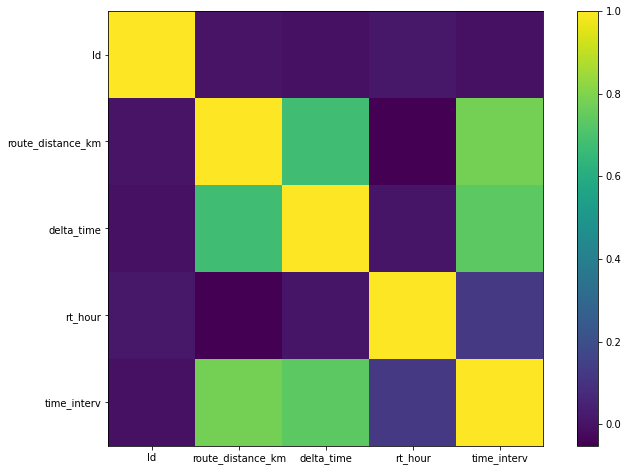

In [133]:
plt.figure(figsize=(12, 8))
columns = ds_ord_1.corr().columns.to_list()
plt.imshow(ds_ord_1.corr())

plt.xticks(range(0, len(columns)), columns)
plt.yticks(range(0, len(columns)), columns)
plt.colorbar()
plt.show()

## Modeling

In [135]:
df.head()

,Id,running_time,completed_time,route_distance_km,delta_time,rt_hour,time_interv
0,7013180891535596072,2022-01-24 11:04:12,2022-01-24 11:14:07,4.061,595.0,11,113.907024
1,-1446874864726772723,2022-01-24 18:31:03,2022-01-24 18:44:03,2.766,780.0,18,113.123569
2,-7109832734562886369,2022-01-24 07:33:11,2022-01-24 07:38:33,2.022,322.0,7,63.004609
3,5574536568610609787,2022-01-24 17:23:20,2022-01-24 17:35:11,4.309,711.0,17,118.916281
4,-9022427340295022993,2022-01-24 18:01:45,2022-01-24 18:07:09,1.819,324.0,18,49.119873


In [208]:
df = df.set_index('Id')

In [209]:
df.head()

,running_time,completed_time,route_distance_km,delta_time,rt_hour,time_interv
Id,,,,,,
7013180891535596072,2022-01-24 11:04:12,2022-01-24 11:14:07,4.061,595.0,11,113.907024
-1446874864726772723,2022-01-24 18:31:03,2022-01-24 18:44:03,2.766,780.0,18,113.123569
-7109832734562886369,2022-01-24 07:33:11,2022-01-24 07:38:33,2.022,322.0,7,63.004609
5574536568610609787,2022-01-24 17:23:20,2022-01-24 17:35:11,4.309,711.0,17,118.916281
-9022427340295022993,2022-01-24 18:01:45,2022-01-24 18:07:09,1.819,324.0,18,49.119873


In [210]:
train, test = train_test_split(df, train_size=0.7, random_state=43)

In [211]:
x_train, y_train = train[['route_distance_km', 'rt_hour', "time_interv"]], train['delta_time']
x_test, y_test = test[['route_distance_km', 'rt_hour', "time_interv"]], test['delta_time']

### Linear Regresion

In [218]:
model_ln = LinearRegression()

In [219]:
model_ln.fit(x_train, y_train)

LinearRegression()

In [221]:
print(f"RMSE train: {mean_squared_error(y_train, model_ln.predict(x_train), squared=False)}")
print(f"RMSE test: {mean_squared_error(y_test, model_ln.predict(x_test), squared=False)}")

MSE train: 137.90430429011406
MSE test: 141.55062932682787


In [236]:
models = [
    LinearRegression(),
    GradientBoostingRegressor(),
    ElasticNet(),
    SGDRegressor(),
    SVR(),
    BayesianRidge(),
    KernelRidge(),
    ElasticNetCV(),
    LarsCV(),
    LassoCV(),
    LassoLarsCV(),
    OrthogonalMatchingPursuitCV(),
    RidgeCV()
]

results = dict()

for m in models:
    # education
    m.fit(x_train, y_train)

    # results
    results[type(m).__name__] = dict()
    results[type(m).__name__]["RMSE"] = mean_squared_error(y_test, m.predict(x_test), squared=False)
    results[type(m).__name__]["MAPE"] = mean_absolute_percentage_error(y_test, m.predict(x_test))
    

    print(f'model: {type(m).__name__}')
    print(f'RMSE: \n{results[type(m).__name__]["RMSE"]}')
    print(f'MAPE: \n{results[type(m).__name__]["MAPE"]}')


model: LinearRegression
RMSE: 
141.55062932682787
MAPE: 
0.20826071544167202
model: GradientBoostingRegressor
RMSE: 
125.74113398703139
MAPE: 
0.17838362949641026
model: ElasticNet
RMSE: 
142.10441248609442
MAPE: 
0.20953943758120142
model: SGDRegressor
RMSE: 
2789225674883.351
MAPE: 
4141264939.610807
model: SVR
RMSE: 
147.22648597945113
MAPE: 
0.21278518035006028
model: BayesianRidge
RMSE: 
141.56280275209093
MAPE: 
0.20830472477020023
model: KernelRidge
RMSE: 
165.85468682284943
MAPE: 
0.2114733936124807
model: ElasticNetCV
RMSE: 
144.92685131851758
MAPE: 
0.2145852207849465
model: LarsCV
RMSE: 
141.55062932682787
MAPE: 
0.20826071544167196
model: LassoCV
RMSE: 
141.88691961914617
MAPE: 
0.20927749858918182
model: LassoLarsCV
RMSE: 
141.55062932682787
MAPE: 
0.20826071544167196
model: OrthogonalMatchingPursuitCV
RMSE: 
141.55062932682787
MAPE: 
0.20826071544167202
model: RidgeCV
RMSE: 
141.55225535978497
MAPE: 
0.2082668795707803


C:\Users\maks1\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\maks1\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce t

In [241]:
loss = ['squared_error', 'absolute_error', 'huber', 'quantile']
n_estimators = [100, 500, 1000]
criterion = ['friedman_mse', 'squared_error']
min_samples_split = [2, 4, 6, 8]
min_samples_leaf = [1, 2, 3, 4]
max_depth = [1, 3, 5]


BASE SETTINGS

model: GradientBoostingRegressor
RMSE: 
125.74113398703139
MAPE: 
0.17838362949641026

In [245]:
rmse_score, mape_score, set_data_rmse, set_data_mape = 500, 500, '', ''

for loss_id in loss:
    for n_est_id in n_estimators:
        for crit_id in criterion:
            for mss_id in min_samples_split:
                for msl_id in min_samples_leaf:
                    for md_id in max_depth:
                        set_data_tmp = f"{loss_id, n_est_id, crit_id, mss_id, msl_id, md_id}"
                        model = GradientBoostingRegressor(loss=loss_id, n_estimators=n_est_id, criterion=crit_id, min_samples_split=mss_id, min_samples_leaf=msl_id, max_depth=md_id, random_state=43)
                        model.fit(x_train, y_train)

                        rmse_score_tmp = mean_squared_error(y_test, model.predict(x_test), squared=False)
                        mape_score_tmp = mean_absolute_percentage_error(y_test, model.predict(x_test))

                        if rmse_score_tmp < rmse_score:
                            rmse_score = rmse_score_tmp
                            set_data_rmse = set_data_tmp
                        if mape_score_tmp < mape_score:
                            mape_score = mape_score_tmp
                            set_data_mape = set_data_tmp


# results
print('model: GradientBoostingRegressor')
print(f'RMSE: \n{rmse_score}\n{set_data_rmse}')
print(f'MAPE: \n{mape_score}\n{set_data_mape}')


model: GradientBoostingRegressor
RMSE: 
125.66694980131297
('absolute_error', 100, 'friedman_mse', 6, 1, 5)
MAPE: 
0.1714665608140207
('absolute_error', 100, 'friedman_mse', 6, 1, 5)
